# Cab booking demand prediction model

Using historical data to analyze trends based on weather conditions (temperature, humidity, windspeed) and time-based features (date, hour, weekday, month).

✅ The key steps in your code:

* Data Loading: Reads training and testing CSV files (train.csv, train_label.csv, test.csv, test_label.csv).
* Data Preprocessing: Combines datasets, renames columns, removes missing values.
* Feature Engineering: Extracts date, hour, weekday, and month from the datetime column.
* Outlier Detection & Removal: Uses IQR method to clean windspeed data.
* Correlation Analysis: Uses a heatmap to check feature relationships.
* Visualization: Plots boxplots and scatter plots for insights.

In [2]:
#Import the required libraries and load the training and testing dataset

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
# Importing the Training Dataset

train_1 = pd.read_csv('/content/train.csv')

# Checking the data
train_1.head(5)

,datetime,temp,atemp,humidity,windspeed
0,2024-01-01 00:00:00,22.490802,18.702659,45.702341,33.635150
1,2024-01-01 01:00:00,34.014286,25.838019,44.818728,39.834070
2,2024-01-01 02:00:00,29.639879,32.458917,84.375275,12.523395
3,2024-01-01 03:00:00,26.973170,29.644498,44.972772,31.243705
4,2024-01-01 04:00:00,18.120373,31.131223,46.316984,28.587299


In [4]:
#Importing the Training 2 Datasets

train_2 = pd.read_csv('/content/train_label.csv')

# checking the data

train_2.head(3)

,Total_Booking
0,25
1,68
2,41


In [5]:
# Joining the Training data sets

train_set = pd.concat([train_1,train_2],axis=1,join='inner')

# checking the Data

train_set.head(3)

,datetime,temp,atemp,humidity,windspeed,Total_Booking
0,2024-01-01 00:00:00,22.490802,18.702659,45.702341,33.635150,25
1,2024-01-01 01:00:00,34.014286,25.838019,44.818728,39.834070,68
2,2024-01-01 02:00:00,29.639879,32.458917,84.375275,12.523395,41


In [6]:
#Importing the Testing Datasets

test_1 = pd.read_csv('/content/test.csv')
test_2 = pd.read_csv('/content/test_label.csv')

#concatenate both the test data sets

testing_set = pd.concat([test_1,test_2],axis=1)

testing_set.head(3)

,datetime,temp,atemp,humidity,windspeed,Total_Booking
0,2024-02-01 00:00:00,22.259657,24.502007,41.560584,48.780096,16
1,2024-02-01 01:00:00,32.585591,32.959104,37.744275,3.263838,76
2,2024-02-01 02:00:00,29.507432,25.500987,47.871564,41.091966,9


In [7]:
# Shape of both the datasets

train_set.shape,testing_set.shape

((1000, 6), (300, 6))

In [8]:
# check the missing values in the data-set

print("Null values in the Training Data set \n")
train_set.isnull().sum()

print("Null values in the test data set \n")
testing_set.isnull().sum()

Null values in the Training Data set 

Null values in the test data set 



,0
datetime,0
temp,0
atemp,0
humidity,0
windspeed,0
Total_Booking,0


In [9]:
# Create new columns date, hour, weekDay, month from datetime column

train_set['date'] = pd.DatetimeIndex(train_set['datetime']).date
train_set["day"] = pd.DatetimeIndex(train_set['datetime']).day_name()
train_set['month'] = pd.DatetimeIndex(train_set['datetime']).month_name()
train_set['hour'] = pd.DatetimeIndex(train_set['datetime']).hour

train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       1000 non-null   object 
 1   temp           1000 non-null   float64
 2   atemp          1000 non-null   float64
 3   humidity       1000 non-null   float64
 4   windspeed      1000 non-null   float64
 5   Total_Booking  1000 non-null   int64  
 6   date           1000 non-null   object 
 7   day            1000 non-null   object 
 8   month          1000 non-null   object 
 9   hour           1000 non-null   int32  
dtypes: float64(4), int32(1), int64(1), object(4)
memory usage: 74.3+ KB


In [10]:
# Create a new Training datasets by creating the .csv file

train_set.to_csv('training_set')
training_set = pd.read_csv('/content/training_set')
training_set.head(5)

,Unnamed: 0,datetime,temp,atemp,humidity,windspeed,Total_Booking,date,day,month,hour
0,0,2024-01-01 00:00:00,22.490802,18.702659,45.702341,33.635150,25,2024-01-01,Monday,January,0
1,1,2024-01-01 01:00:00,34.014286,25.838019,44.818728,39.834070,68,2024-01-01,Monday,January,1
2,2,2024-01-01 02:00:00,29.639879,32.458917,84.375275,12.523395,41,2024-01-01,Monday,January,2
3,3,2024-01-01 03:00:00,26.973170,29.644498,44.972772,31.243705,31,2024-01-01,Monday,January,3
4,4,2024-01-01 04:00:00,18.120373,31.131223,46.316984,28.587299,59,2024-01-01,Monday,January,4


## Outlier Analysis

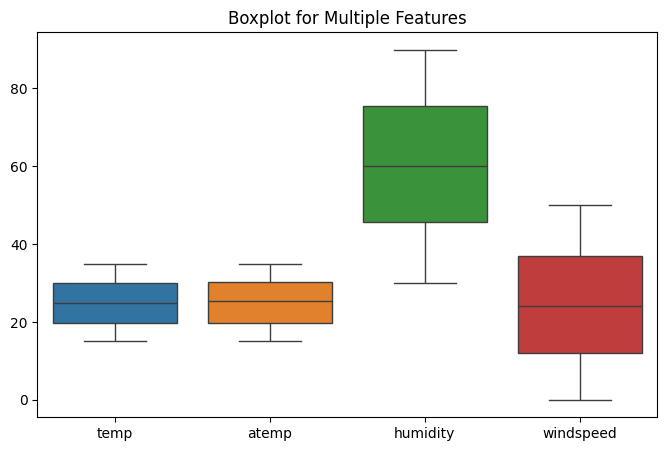

In [11]:
# Columns to create box plot
columns = ["temp", "atemp", "humidity", "windspeed"]

# Create multiple boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(data=training_set[columns])
plt.title("Boxplot for Multiple Features")
plt.show()

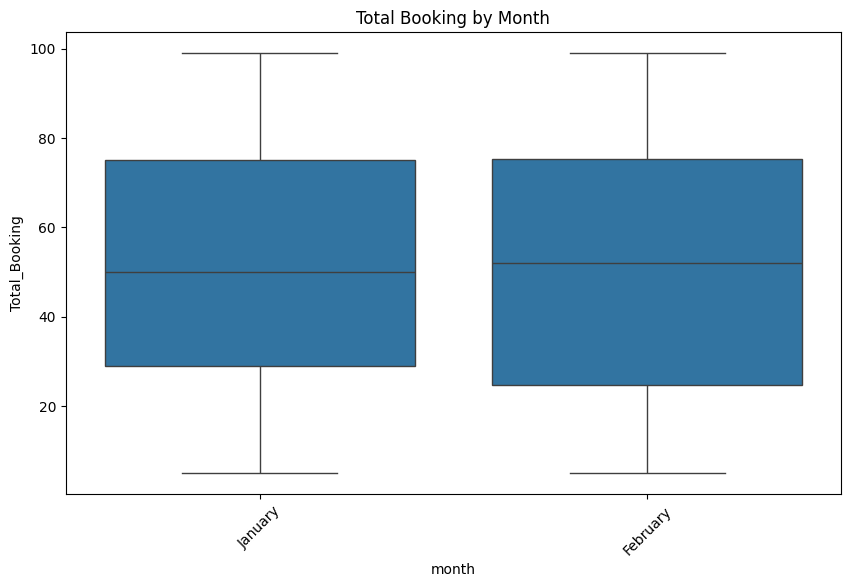

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="month", y="Total_Booking", data=training_set)
plt.title("Total Booking by Month")
plt.xticks(rotation=45)
plt.show()

There is no Outlier in the training data

## Model Training

In [13]:
# Importing the necessary headers

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
# Load Cleaned Data
train = pd.read_csv("/content/training_set")

train.head(2)

,Unnamed: 0,datetime,temp,atemp,humidity,windspeed,Total_Booking,date,day,month,hour
0,0,2024-01-01 00:00:00,22.490802,18.702659,45.702341,33.63515,25,2024-01-01,Monday,January,0
1,1,2024-01-01 01:00:00,34.014286,25.838019,44.818728,39.83407,68,2024-01-01,Monday,January,1


In [15]:
# Feature Selection

X = train[["temp", "humidity", "hour"]]
y = train["Total_Booking"]

In [16]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict & Evaluate
predictions = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, predictions))

MAE: 23.93884268317303


In [18]:

# Predictions
y_pred = model.predict(X_test)

In [19]:
# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 23.94
Mean Squared Error (MSE): 784.88
Root Mean Squared Error (RMSE): 28.02
R² Score: -0.01


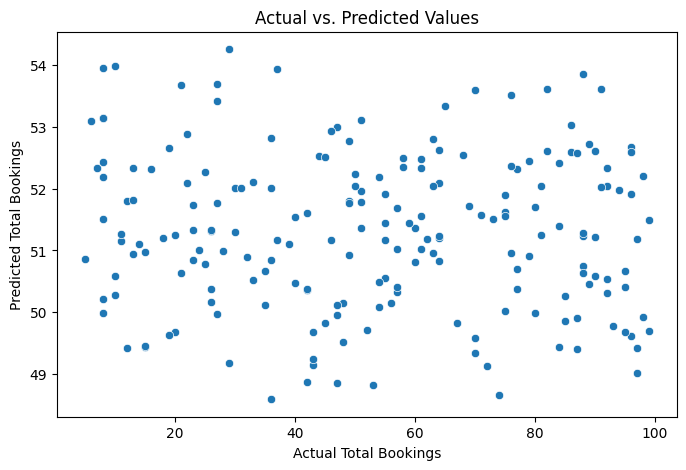

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Total Bookings")
plt.ylabel("Predicted Total Bookings")
plt.title("Actual vs. Predicted Values")
plt.show()

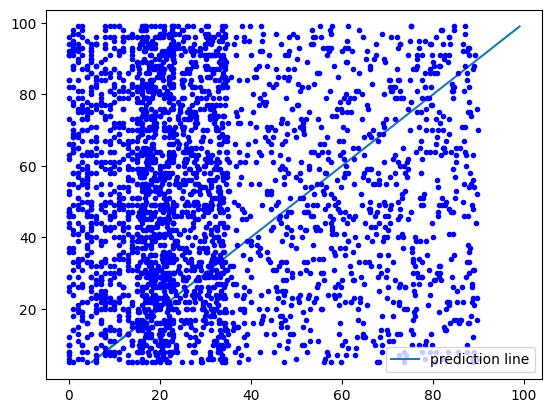

In [24]:
plt.plot(y_test, y_test , label = "prediction line")
plt.plot(X, y, "b.")
plt.legend()
plt.show()

**Model Performance Inference (Linear Regression)**

Based on the calculated performance metrics:

1. Mean Absolute Error (MAE): 23.94
On average, the model's predictions deviate by 23.94 bookings from the actual values.
Lower MAE is desirable, meaning the model should be more precise.
2. Mean Squared Error (MSE): 784.88 & RMSE: 28.02
MSE is quite high, meaning the squared differences between predicted and actual values are significant.
RMSE (28.02) confirms that the model's typical error is around 28 bookings, which is not ideal.
3. R² Score: -0.01
An R² value close to 1 indicates a good fit.
Here, R² = -0.01, which is very poor, meaning the model is not explaining the variance in the data.

A negative R² suggests the model performs worse than a simple mean prediction (baseline model).

📉 Conclusion:

❌ The Linear Regression model is not performing well.


**Possible reasons**

* Feature selection issues: Additional relevant features might be needed.
* Linear Assumptions: The relationship between independent variables and the target may not be linear.
* Data Scaling: Standardization or normalization may improve results.
* Model Selection: More complex models (Random Forest, Gradient Boosting, or Neural Networks) may be needed.

🔹 Next Steps:
*  Try feature engineering (adding/removing features).
*  Experiment with polynomial regression or tree-based models.
* Standardize/normalize numerical features.
*  Perform hyperparameter tuning.